In [215]:
import numpy as np
import pandas as pd

In [216]:
##Importação dos dados de treino

In [217]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [218]:
##Remoção de colunas inteiramente preenchidas por NaN

In [219]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [220]:
##Introdução do cabeçalho do data frame

In [221]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [222]:
##Geração de Histogramas e seleção de variáveis

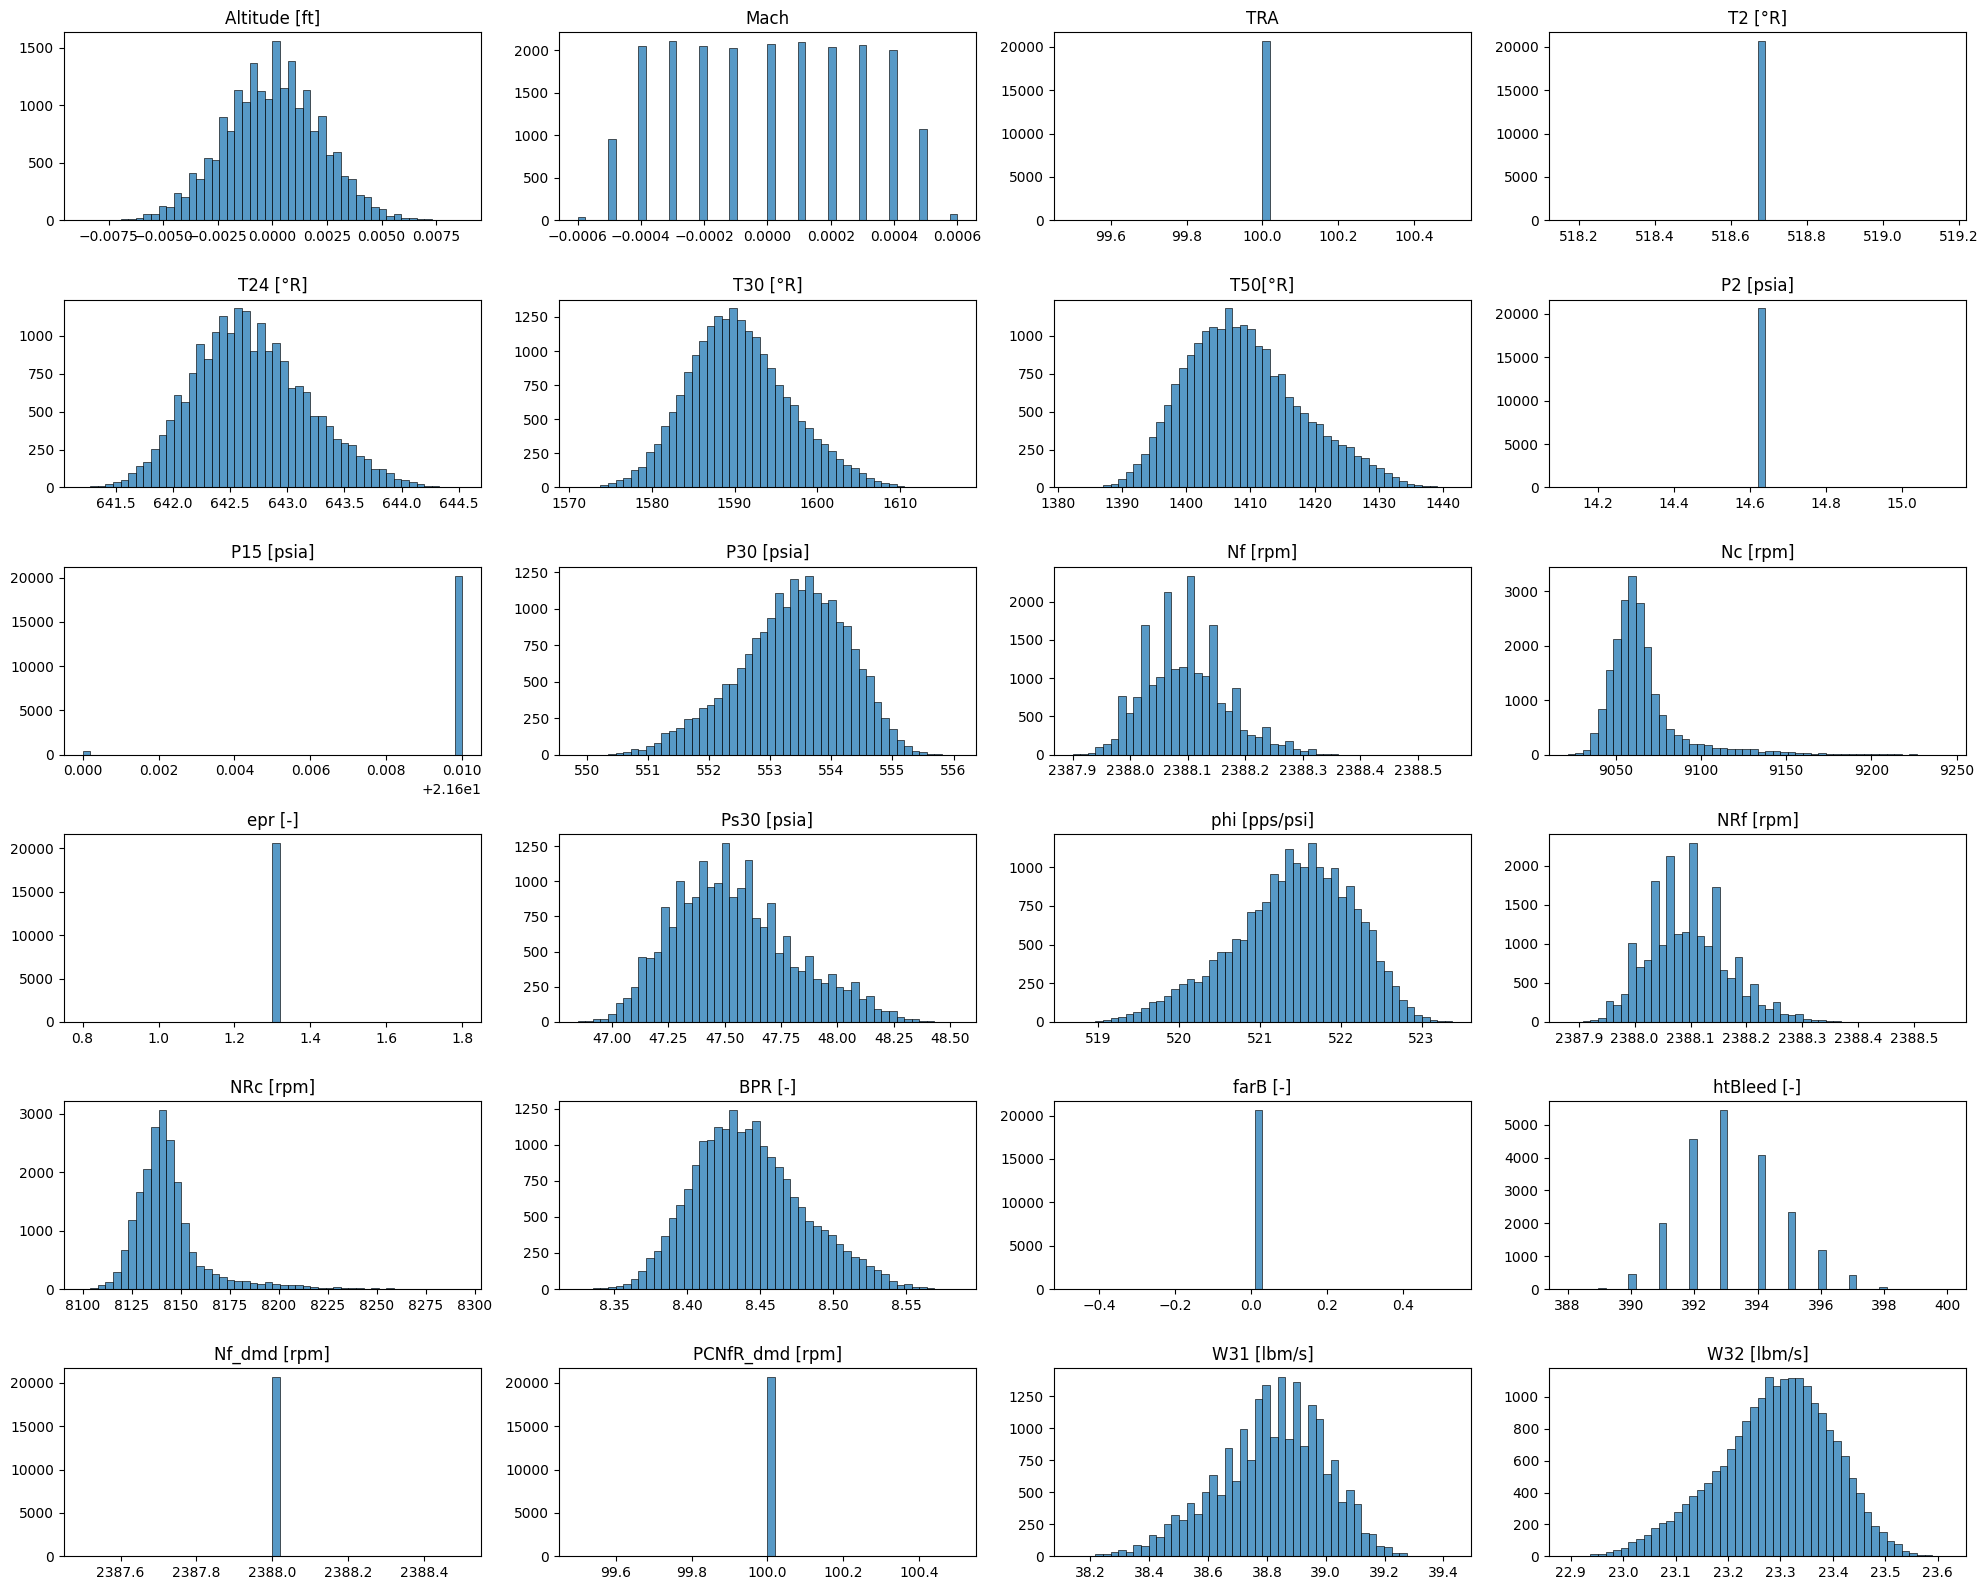

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [224]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [225]:
##Normalização

In [226]:
from sklearn.preprocessing import MinMaxScaler

In [227]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [228]:
##Definição dos targets para regressão e classificação nos dados de treino

In [229]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [230]:
##Visualização de um ciclo de vida de um motor

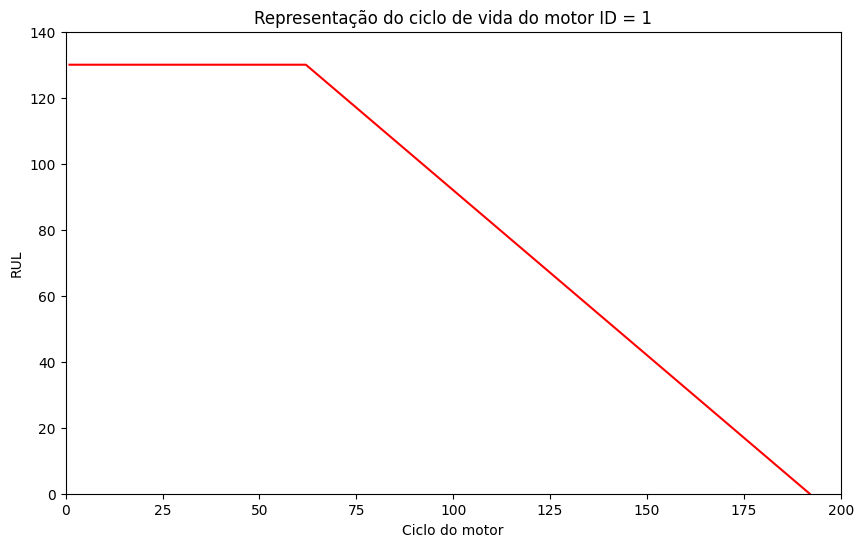

In [231]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [232]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [233]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [234]:
##Criação das janelas de tempo para dados de treino e de teste

In [235]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [236]:
##Separação das variáveis de treino e teste

In [237]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [238]:
##Criação do modelo LSTM

In [239]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [240]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 4351.3516 - mean_absolute_error: 54.7520 - mean_squared_error: 4351.3516

71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 330ms/step - loss: 2658.0513 - mean_absolute_error: 43.1265 - mean_squared_error: 2658.0513 - val_loss: 1982.9771 - val_mean_absolute_error: 36.9940 - val_mean_squared_error: 1982.9771
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 1026.9569 - mean_absolute_error: 26.0643 - mean_squared_error: 1026.9569

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 886.0295 - mean_absolute_error: 24.0165 - mean_squared_error: 886.0295 - val_loss: 1069.6882 - val_mean_absolute_error: 26.0215 - val_mean_squared_error: 1069.6882
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 741.3237 - mean_absolute_error: 21.5448 - mean_squared_error: 741.3237

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 699.1808 - mean_absolute_error: 20.8343 - mean_squared_error: 699.1808 - val_loss: 859.1910 - val_mean_absolute_error: 21.8181 - val_mean_squared_error: 859.1910
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 645.9216 - mean_absolute_error: 19.8415 - mean_squared_error: 645.9216

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - loss: 598.5950 - mean_absolute_error: 19.0433 - mean_squared_error: 598.5950 - val_loss: 478.7360 - val_mean_absolute_error: 17.1111 - val_mean_squared_error: 478.7360
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 511.1443 - mean_absolute_error: 17.4693 - mean_squared_error: 511.1443

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 490.0312 - mean_absolute_error: 17.0739 - mean_squared_error: 490.0312 - val_loss: 318.7555 - val_mean_absolute_error: 14.0381 - val_mean_squared_error: 318.7555
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 416.1779 - mean_absolute_error: 15.7856 - mean_squared_error: 416.1779

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 311ms/step - loss: 420.7771 - mean_absolute_error: 15.7846 - mean_squared_error: 420.7771 - val_loss: 317.0089 - val_mean_absolute_error: 13.7921 - val_mean_squared_error: 317.0089
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 410.9551 - mean_absolute_error: 15.6109 - mean_squared_error: 410.9551

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - loss: 404.7959 - mean_absolute_error: 15.5201 - mean_squared_error: 404.7958 - val_loss: 395.0127 - val_mean_absolute_error: 15.6866 - val_mean_squared_error: 395.0127
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 392.5132 - mean_absolute_error: 15.1586 - mean_squared_error: 392.5132

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 378.6880 - mean_absolute_error: 14.9028 - mean_squared_error: 378.6880 - val_loss: 342.8184 - val_mean_absolute_error: 12.9129 - val_mean_squared_error: 342.8184
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 351.8485 - mean_absolute_error: 14.2232 - mean_squared_error: 351.8485

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 359.5906 - mean_absolute_error: 14.4237 - mean_squared_error: 359.5906 - val_loss: 378.9741 - val_mean_absolute_error: 15.7557 - val_mean_squared_error: 378.9741
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 350.7971 - mean_absolute_error: 14.2858 - mean_squared_error: 350.7971

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - loss: 339.1327 - mean_absolute_error: 14.0085 - mean_squared_error: 339.1327 - val_loss: 285.7322 - val_mean_absolute_error: 13.0564 - val_mean_squared_error: 285.7322
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 356.4068 - mean_absolute_error: 14.2754 - mean_squared_error: 356.4068

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - loss: 344.9292 - mean_absolute_error: 14.0314 - mean_squared_error: 344.9292 - val_loss: 281.9724 - val_mean_absolute_error: 13.2040 - val_mean_squared_error: 281.9724
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 323.2122 - mean_absolute_error: 13.6157 - mean_squared_error: 323.2122

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - loss: 322.6593 - mean_absolute_error: 13.5594 - mean_squared_error: 322.6593 - val_loss: 228.3894 - val_mean_absolute_error: 11.0176 - val_mean_squared_error: 228.3893
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 307.2150 - mean_absolute_error: 13.1924 - mean_squared_error: 307.2150

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - loss: 318.1198 - mean_absolute_error: 13.4051 - mean_squared_error: 318.1198 - val_loss: 283.5509 - val_mean_absolute_error: 12.8949 - val_mean_squared_error: 283.5509
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 306.9896 - mean_absolute_error: 13.2013 - mean_squared_error: 306.9896

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 309.7840 - mean_absolute_error: 13.3027 - mean_squared_error: 309.7840 - val_loss: 301.4028 - val_mean_absolute_error: 13.1647 - val_mean_squared_error: 301.4028
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 306.4783 - mean_absolute_error: 13.1386 - mean_squared_error: 306.4783

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - loss: 307.2773 - mean_absolute_error: 13.2132 - mean_squared_error: 307.2773 - val_loss: 245.2561 - val_mean_absolute_error: 10.8323 - val_mean_squared_error: 245.2561
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 373.5708 - mean_absolute_error: 13.9710 - mean_squared_error: 373.5708

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 322.7974 - mean_absolute_error: 13.3366 - mean_squared_error: 322.7974 - val_loss: 209.3379 - val_mean_absolute_error: 10.7561 - val_mean_squared_error: 209.3379
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 280.5262 - mean_absolute_error: 12.6191 - mean_squared_error: 280.5262

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 289.5651 - mean_absolute_error: 12.7895 - mean_squared_error: 289.5651 - val_loss: 354.2950 - val_mean_absolute_error: 14.2948 - val_mean_squared_error: 354.2950
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 294.1111 - mean_absolute_error: 12.9571 - mean_squared_error: 294.1111

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - loss: 292.0818 - mean_absolute_error: 12.8687 - mean_squared_error: 292.0818 - val_loss: 210.7879 - val_mean_absolute_error: 10.5059 - val_mean_squared_error: 210.7879
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 290.8519 - mean_absolute_error: 12.6857 - mean_squared_error: 290.8519

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 301.3870 - mean_absolute_error: 12.7759 - mean_squared_error: 301.3870 - val_loss: 284.6660 - val_mean_absolute_error: 12.8198 - val_mean_squared_error: 284.6660
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 285.1134 - mean_absolute_error: 12.7125 - mean_squared_error: 285.1134

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 282.2675 - mean_absolute_error: 12.6033 - mean_squared_error: 282.2675 - val_loss: 255.1372 - val_mean_absolute_error: 12.1070 - val_mean_squared_error: 255.1372
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 279.8910 - mean_absolute_error: 12.5583 - mean_squared_error: 279.8910

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 276.6403 - mean_absolute_error: 12.4930 - mean_squared_error: 276.6403 - val_loss: 259.7338 - val_mean_absolute_error: 12.0912 - val_mean_squared_error: 259.7338


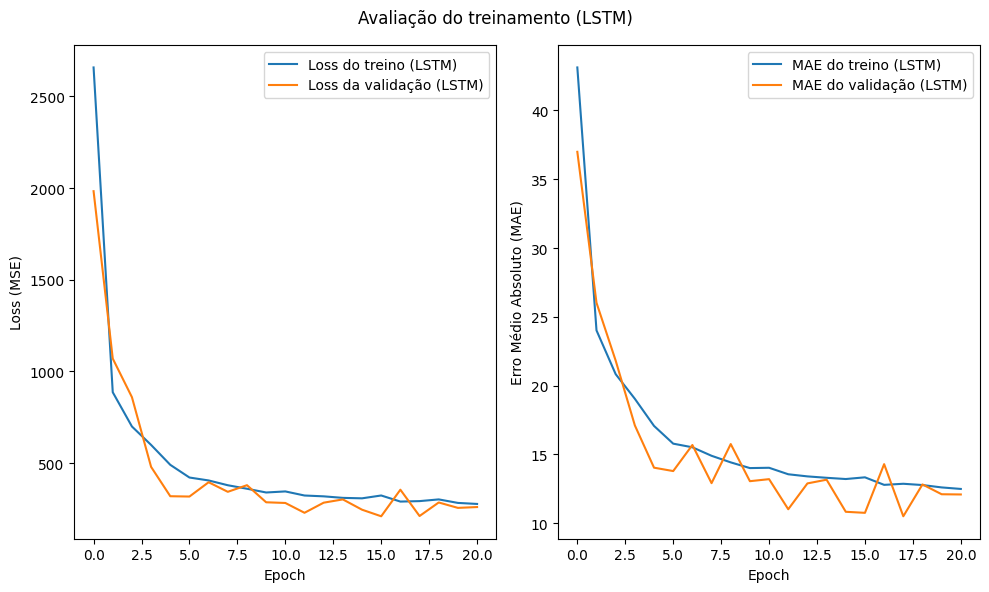

In [241]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [242]:
##Testando o modelo com os dados de teste 

In [243]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


In [244]:
##Avaliando o modelo

288.4796229757267
16.98
0.1350974570077391
13.045263032063918
0.7087052131725919
Tempo de 469.161602s


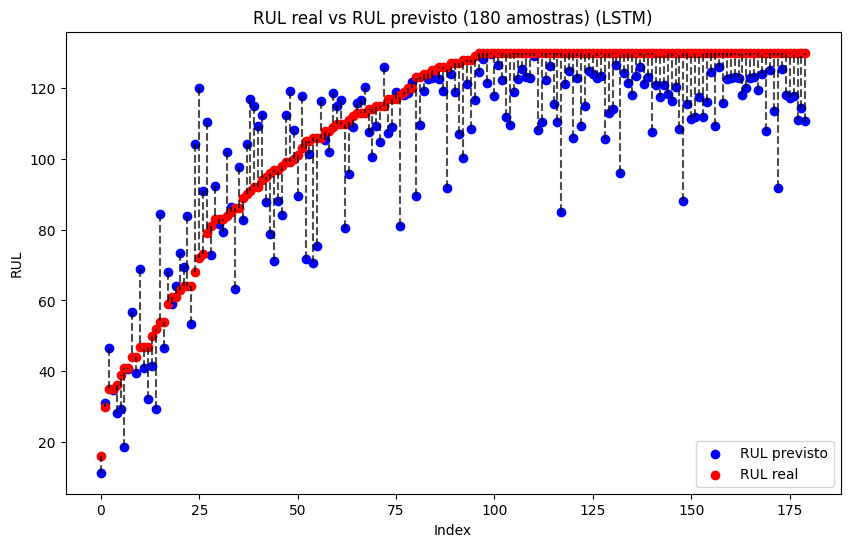

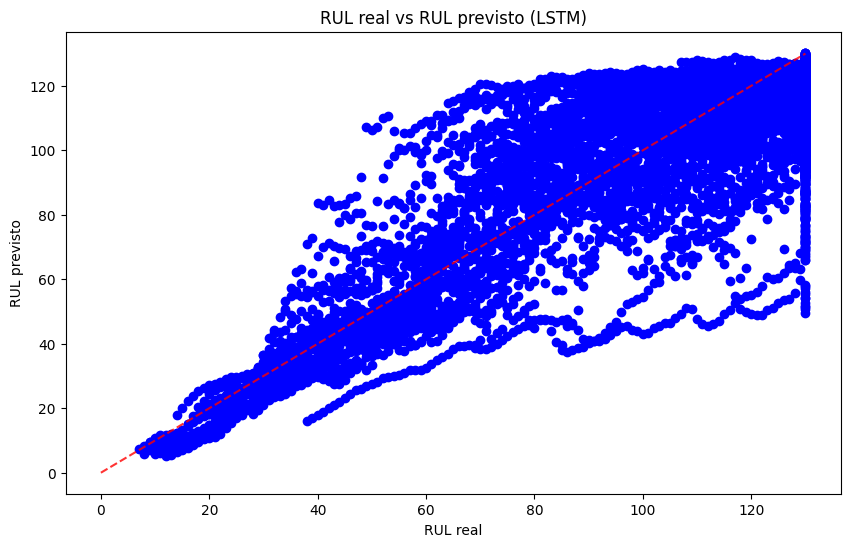

In [245]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [246]:
##Criando modelo BiLSTM

In [247]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [248]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5168.4878 - mean_absolute_error: 60.5511 - mean_squared_error: 5168.4878

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 3372.4885 - mean_absolute_error: 48.7974 - mean_squared_error: 3372.4885 - val_loss: 1732.6609 - val_mean_absolute_error: 37.0082 - val_mean_squared_error: 1732.6609
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1310.1039 - mean_absolute_error: 31.1635 - mean_squared_error: 1310.1039

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1053.5980 - mean_absolute_error: 27.2324 - mean_squared_error: 1053.5980 - val_loss: 663.3904 - val_mean_absolute_error: 21.7493 - val_mean_squared_error: 663.3904
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 745.9603 - mean_absolute_error: 21.9114 - mean_squared_error: 745.9603

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 730.0512 - mean_absolute_error: 21.5290 - mean_squared_error: 730.0512 - val_loss: 564.6274 - val_mean_absolute_error: 19.6489 - val_mean_squared_error: 564.6274
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 655.0198 - mean_absolute_error: 20.1338 - mean_squared_error: 655.0198

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 635.1297 - mean_absolute_error: 19.8500 - mean_squared_error: 635.1297 - val_loss: 619.4527 - val_mean_absolute_error: 19.9390 - val_mean_squared_error: 619.4527
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 622.6631 - mean_absolute_error: 19.6910 - mean_squared_error: 622.6631

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 615.0985 - mean_absolute_error: 19.4955 - mean_squared_error: 615.0985 - val_loss: 383.6447 - val_mean_absolute_error: 15.8932 - val_mean_squared_error: 383.6447
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 584.7570 - mean_absolute_error: 18.9879 - mean_squared_error: 584.7570

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 567.2933 - mean_absolute_error: 18.6555 - mean_squared_error: 567.2933 - val_loss: 381.4026 - val_mean_absolute_error: 15.9820 - val_mean_squared_error: 381.4026
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 524.5290 - mean_absolute_error: 17.9767 - mean_squared_error: 524.5290

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 524.0352 - mean_absolute_error: 17.8914 - mean_squared_error: 524.0352 - val_loss: 349.3837 - val_mean_absolute_error: 15.3101 - val_mean_squared_error: 349.3837
Epoch 8/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 484.4836 - mean_absolute_error: 17.1587 - mean_squared_error: 484.4836

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 493.1564 - mean_absolute_error: 17.2920 - mean_squared_error: 493.1565 - val_loss: 409.6885 - val_mean_absolute_error: 14.7178 - val_mean_squared_error: 409.6885
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 513.9817 - mean_absolute_error: 17.5662 - mean_squared_error: 513.9818

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 471.4141 - mean_absolute_error: 16.8093 - mean_squared_error: 471.4141 - val_loss: 462.0034 - val_mean_absolute_error: 15.7546 - val_mean_squared_error: 462.0034
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 466.3230 - mean_absolute_error: 16.6959 - mean_squared_error: 466.3230

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 449.0808 - mean_absolute_error: 16.4306 - mean_squared_error: 449.0808 - val_loss: 278.7954 - val_mean_absolute_error: 13.1744 - val_mean_squared_error: 278.7954
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 414.1563 - mean_absolute_error: 15.6758 - mean_squared_error: 414.1563

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 418.2183 - mean_absolute_error: 15.7863 - mean_squared_error: 418.2183 - val_loss: 323.5385 - val_mean_absolute_error: 13.2882 - val_mean_squared_error: 323.5385
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 437.8912 - mean_absolute_error: 16.0886 - mean_squared_error: 437.8912

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 416.5279 - mean_absolute_error: 15.7380 - mean_squared_error: 416.5279 - val_loss: 262.5449 - val_mean_absolute_error: 12.2782 - val_mean_squared_error: 262.5449
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 404.1095 - mean_absolute_error: 15.5248 - mean_squared_error: 404.1095

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 401.8090 - mean_absolute_error: 15.4799 - mean_squared_error: 401.8090 - val_loss: 338.9265 - val_mean_absolute_error: 14.3825 - val_mean_squared_error: 338.9265
Epoch 14/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 384.7399 - mean_absolute_error: 15.0795 - mean_squared_error: 384.7399

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 385.5046 - mean_absolute_error: 15.1200 - mean_squared_error: 385.5046 - val_loss: 284.1264 - val_mean_absolute_error: 11.9149 - val_mean_squared_error: 284.1264
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 396.7174 - mean_absolute_error: 15.3765 - mean_squared_error: 396.7174

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 391.1390 - mean_absolute_error: 15.2423 - mean_squared_error: 391.1390 - val_loss: 236.6618 - val_mean_absolute_error: 12.0378 - val_mean_squared_error: 236.6618
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 380.6124 - mean_absolute_error: 14.9982 - mean_squared_error: 380.6124

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 372.2083 - mean_absolute_error: 14.8166 - mean_squared_error: 372.2083 - val_loss: 292.1834 - val_mean_absolute_error: 13.3430 - val_mean_squared_error: 292.1834
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 379.0275 - mean_absolute_error: 14.9390 - mean_squared_error: 379.0275

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 368.0091 - mean_absolute_error: 14.7156 - mean_squared_error: 368.0091 - val_loss: 241.5015 - val_mean_absolute_error: 11.6521 - val_mean_squared_error: 241.5015
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 346.4448 - mean_absolute_error: 14.3539 - mean_squared_error: 346.4448

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 359.0091 - mean_absolute_error: 14.5593 - mean_squared_error: 359.0091 - val_loss: 243.1508 - val_mean_absolute_error: 11.9179 - val_mean_squared_error: 243.1508
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 342.2411 - mean_absolute_error: 14.2172 - mean_squared_error: 342.2411

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 349.7813 - mean_absolute_error: 14.3776 - mean_squared_error: 349.7813 - val_loss: 213.5122 - val_mean_absolute_error: 11.1368 - val_mean_squared_error: 213.5122
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 342.5851 - mean_absolute_error: 14.1064 - mean_squared_error: 342.5851

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 346.9573 - mean_absolute_error: 14.2642 - mean_squared_error: 346.9573 - val_loss: 222.2833 - val_mean_absolute_error: 11.6256 - val_mean_squared_error: 222.2833
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 320.2701 - mean_absolute_error: 13.7522 - mean_squared_error: 320.2701

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 332.4709 - mean_absolute_error: 13.9894 - mean_squared_error: 332.4709 - val_loss: 237.7418 - val_mean_absolute_error: 11.4109 - val_mean_squared_error: 237.7418
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 321.8002 - mean_absolute_error: 13.7579 - mean_squared_error: 321.8002

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 332.4456 - mean_absolute_error: 13.9927 - mean_squared_error: 332.4456 - val_loss: 259.4754 - val_mean_absolute_error: 11.6019 - val_mean_squared_error: 259.4754
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 344.9380 - mean_absolute_error: 14.1866 - mean_squared_error: 344.9380

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 337.1918 - mean_absolute_error: 14.0058 - mean_squared_error: 337.1918 - val_loss: 203.3405 - val_mean_absolute_error: 10.7534 - val_mean_squared_error: 203.3405
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 323.9446 - mean_absolute_error: 13.7291 - mean_squared_error: 323.9446

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 319.4541 - mean_absolute_error: 13.6111 - mean_squared_error: 319.4541 - val_loss: 215.8538 - val_mean_absolute_error: 10.8523 - val_mean_squared_error: 215.8538
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 330.8675 - mean_absolute_error: 13.8662 - mean_squared_error: 330.8675

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 326.2808 - mean_absolute_error: 13.7600 - mean_squared_error: 326.2808 - val_loss: 210.5940 - val_mean_absolute_error: 10.9698 - val_mean_squared_error: 210.5940
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 312.1140 - mean_absolute_error: 13.4936 - mean_squared_error: 312.1140

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 318.0739 - mean_absolute_error: 13.6012 - mean_squared_error: 318.0739 - val_loss: 213.5527 - val_mean_absolute_error: 10.9706 - val_mean_squared_error: 213.5527
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 306.8560 - mean_absolute_error: 13.4107 - mean_squared_error: 306.8560

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 316.3914 - mean_absolute_error: 13.5806 - mean_squared_error: 316.3913 - val_loss: 220.7565 - val_mean_absolute_error: 11.5753 - val_mean_squared_error: 220.7565
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 314.3011 - mean_absolute_error: 13.5265 - mean_squared_error: 314.3011

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 312.1143 - mean_absolute_error: 13.4862 - mean_squared_error: 312.1143 - val_loss: 228.4202 - val_mean_absolute_error: 11.3498 - val_mean_squared_error: 228.4202


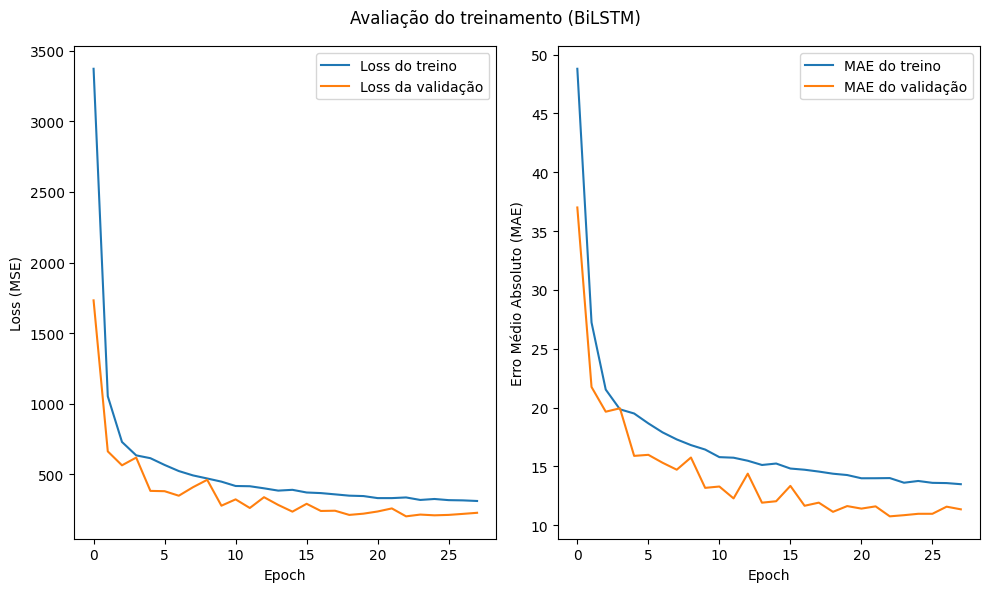

In [249]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [250]:
##Testando o modelo com os dados de teste

In [251]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [252]:
##Avaliando o modelo

268.25253311216875
16.38
0.1306115175123507
12.496711311736917
0.7291296915782632
Tempo de 183.474173s


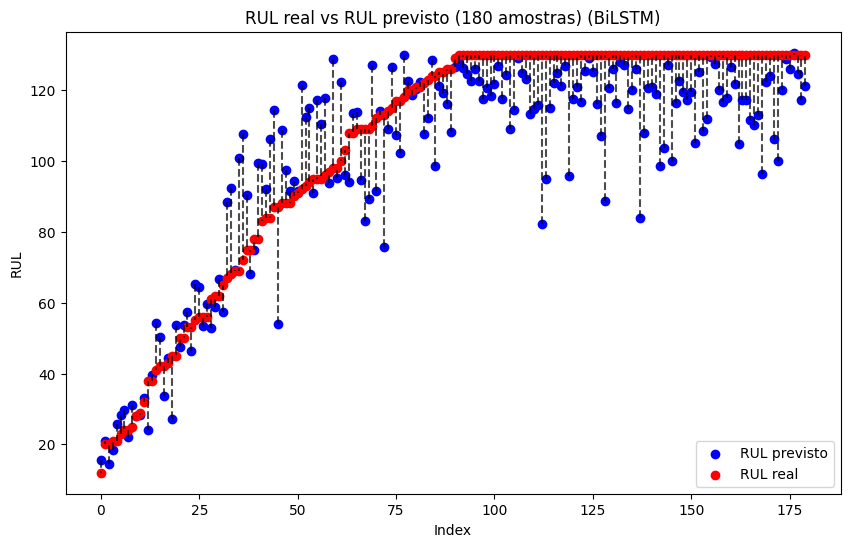

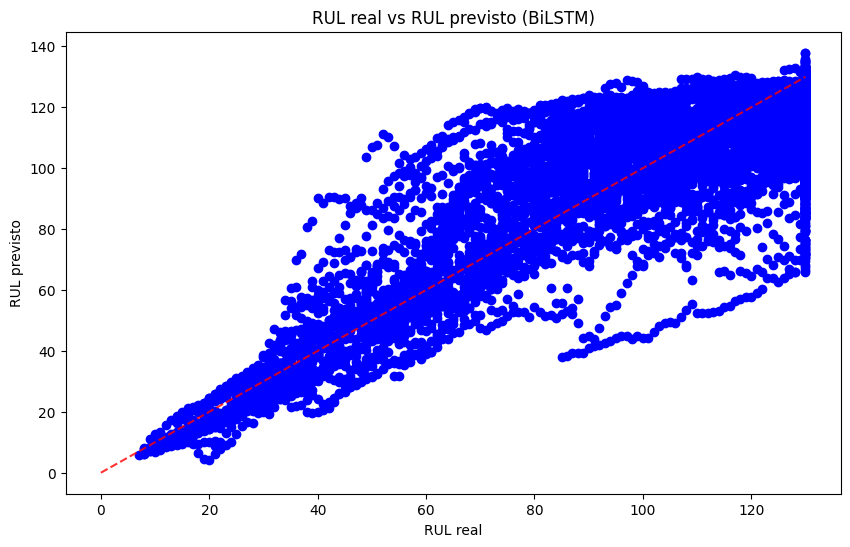

In [253]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()